In [ ]:
pip install wget

In [1]:
import astropy
from gpz_pype import utilities
from astropy.table import Table,vstack, Column
from subprocess import call
import subprocess
from astropy.io import fits
import numpy as np
import wget
import matplotlib.pyplot as plt

In [ ]:
fields = ['ceers-full','gdn','gds','ngdeep','primer-cosmos-east','primer-cosmos-west','primer-uds-north','primer-uds-south']

In [ ]:
for field in fields:
    url=f'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/{field}-grizli-v7.0_phot.fits'
    filename=wget.download(url)
    print(f'{field} downloaded)

In [2]:

hdu_list = fits.open('ceers-full-grizli-v7.0_phot.fits', memmap=True,formats='fits')
ceers = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('gdn-grizli-v7.0_phot.fits', memmap=True,formats='fits')
gdn= Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('gds-grizli-v7.0_phot.fits', memmap=True,formats='fits')
gds = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('ngdeep-grizli-v7.0_phot.fits', memmap=True,formats='fits')
ngdeep = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('primer-cosmos-east-grizli-v7.0_phot.fits', memmap=True,formats='fits')
cosmos_east = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('primer-cosmos-west-grizli-v7.0_phot.fits', memmap=True,formats='fits')
cosmos_west = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('primer-uds-south-grizli-v7.0_phot.fits', memmap=True,formats='fits')
udss = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('primer-uds-north-grizli-v7.0_phot.fits', memmap=True,formats='fits')
udsn = Table(hdu_list[1].data)
hdu_list.close()

In [4]:
ceers.add_column('ceers', name='field', index=0)
gds.add_column('gds', name='field', index=0)
gdn.add_column('gdn', name='field', index=0)
ngdeep.add_column('ngdeep', name='field', index=0)
cosmos_east.add_column('cosmos_east', name='field', index=0)
cosmos_west.add_column('cosmos_west', name='field', index=0)
udss.add_column('udss', name='field', index=0)
udsn.add_column('udsn', name='field', index=0)

In [ ]:
con=vstack([ceers,gds,gdn,ngdeep,cosmos_east,cosmos_west,udss,udsn])

In [45]:
ceers_aper0=[]
gds_aper0=[]
gdn_aper0=[]
cosmos_west_aper0=[]
cosmos_east_aper0=[]
udss_aper0=[]
udsn_aper0=[]
ngdeep_aper0=[]

aper='aper_1'
for i in range(len(ceers.colnames)):
    if ceers.colnames[i].endswith(f'flux_{aper}'):
        ceers_aper0.append(ceers.colnames[i])
for i in range(len(gds.colnames)):
    if gds.colnames[i].endswith(f'flux_{aper}'):
        gds_aper0.append(gds.colnames[i])
for i in range(len(gdn.colnames)):
    if gdn.colnames[i].endswith(f'flux_{aper}'):
        gdn_aper0.append(gdn.colnames[i])
        
for i in range(len(cosmos_west.colnames)):
    if cosmos_west.colnames[i].endswith(f'flux_{aper}'):
        cosmos_west_aper0.append(cosmos_west.colnames[i])
        
for i in range(len(cosmos_east.colnames)):
    if cosmos_east.colnames[i].endswith(f'flux_{aper}'):
        cosmos_east_aper0.append(cosmos_east.colnames[i])
        
for i in range(len(udss.colnames)):
    if udss.colnames[i].endswith(f'flux_{aper}'):
        udss_aper0.append(udss.colnames[i])
        
for i in range(len(udsn.colnames)):
    if udsn.colnames[i].endswith(f'flux_{aper}'):
        udsn_aper0.append(udsn.colnames[i])
        
for i in range(len(ngdeep.colnames)):
    if ngdeep.colnames[i].endswith(f'flux_{aper}'):
        ngdeep_aper0.append(ngdeep.colnames[i])

In [68]:
common=[]
for name in gds_aper0:
    #if name in ceers_aper0:
        if name in gdn_aper0:
            if name in udss_aper0:
                if name in udsn_aper0:
                #if name in cosmos_west_aper0:
                    #if name in cosmos_east_aper0:
                        #if name in ngdeep_aper0:

                                common.append(name)
    #for name_gds in gds_aper0:
     #   for name_gdn in gdn_aper0:
      #      if name==name_gds:
                
print(common)          

['flux_aper_1', 'f105w_flux_aper_1', 'f115w-clear_flux_aper_1', 'f125w_flux_aper_1', 'f140w_flux_aper_1', 'f150w-clear_flux_aper_1', 'f160w_flux_aper_1', 'f350lpu_flux_aper_1', 'f356w-clear_flux_aper_1', 'f435w_flux_aper_1', 'f444w-clear_flux_aper_1', 'f606w_flux_aper_1', 'f775w_flux_aper_1', 'f814w_flux_aper_1', 'f850lp_flux_aper_1']


In [77]:

for name in gds_aper0:
    if ~np.isnan(gds[f'{name}']).any()==True:
        print(f'{name} does not contains nan')


f125w_flux_aper_1 does not contains nan
f160w_flux_aper_1 does not contains nan
f606w_flux_aper_1 does not contains nan
f814w_flux_aper_1 does not contains nan
f850lp_flux_aper_1 does not contains nan


In [5]:
filt='f115w-clear_flux_aper_1'
cat_ceers = ceers[f'{filt}','flux_auto','flux_aper_1']
cat_gds= gds[f'{filt}','flux_auto','flux_aper_1']
cat_gdn = gdn[f'{filt}','flux_auto','flux_aper_1']
cat_ngdeep = ngdeep[f'{filt}','flux_auto','flux_aper_1']
cat_cosmos_west = cosmos_west[f'{filt}','flux_auto','flux_aper_1']
cat_cosmos_east = cosmos_east[f'{filt}','flux_auto','flux_aper_1']
cat_udss = udss[f'{filt}','flux_auto','flux_aper_1']
cat_udsn = udsn[f'{filt}','flux_auto','flux_aper_1']


    


In [7]:
flux_ceers=[]
mag_ceers=[]

flux_gds=[]
mag_gds=[]

flux_gdn=[]
#mag_gdn=[]

flux_ngdeep=[]
mag_ngdeep=[]

flux_cosmos_west=[]
mag_cosmos_west=[]

flux_udss=[]
mag_udss=[]

flux_udsn=[]
#mag_udsn=[]

flux_cosmos_east=[]
#mag_cosmos_east=[]

for j in range(len(cat_ceers)):
    flux_ceers.append((cat_ceers[f'{filt}'][j] * cat_ceers['flux_auto'][j]) /cat_ceers['flux_aper_1'][j])
    mag_ceers.append(23.9-(2.5*np.log10(flux_ceers[j])))
for j in range(len(cat_gds)):
    flux_gds.append((cat_gds[f'{filt}'][j] * cat_gds['flux_auto'][j]) /cat_gds['flux_aper_1'][j])
    mag_gds.append(23.9-(2.5*np.log10(flux_gds[j])))
for j in range(len(cat_gdn)):
    flux_gdn.append((cat_gdn[f'{filt}'][j] * cat_gdn['flux_auto'][j]) /cat_gdn['flux_aper_1'][j])
    mag_gds.append(23.9-(2.5*np.log10(flux_gdn[j])))
for j in range(len(cat_cosmos_west)):
    flux_cosmos_west.append((cat_cosmos_west[f'{filt}'][j] * cat_cosmos_west['flux_auto'][j]) /cat_cosmos_west['flux_aper_1'][j])
    mag_cosmos_west.append(23.9-(2.5*np.log10(flux_cosmos_west[j])))
for j in range(len(cat_cosmos_east)):
    flux_cosmos_east.append((cat_cosmos_east[f'{filt}'][j] * cat_cosmos_east['flux_auto'][j]) /cat_cosmos_east['flux_aper_1'][j])
    mag_cosmos_west.append(23.9-(2.5*np.log10(flux_cosmos_east[j])))
for j in range(len(cat_udss)):
    flux_udss.append((cat_udss[f'{filt}'][j] * cat_udss['flux_auto'][j]) /cat_udss['flux_aper_1'][j])
    mag_udss.append(23.9-(2.5*np.log10(flux_udss[j])))
for j in range(len(cat_udsn)):
    flux_udsn.append((cat_udsn[f'{filt}'][j] * cat_udsn['flux_auto'][j]) /cat_udsn['flux_aper_1'][j])
    mag_udss.append(23.9-(2.5*np.log10(flux_udsn[j])))
for j in range(len(cat_ngdeep)):
    flux_ngdeep.append((cat_ngdeep[f'{filt}'][j] * cat_ngdeep['flux_auto'][j]) /cat_ngdeep['flux_aper_1'][j])
    mag_ngdeep.append(23.9-(2.5*np.log10(flux_ngdeep[j])))


/tmp/ipykernel_25375/15431981.py:27: RuntimeWarning: invalid value encountered in log10
  mag_ceers.append(23.9-(2.5*np.log10(flux_ceers[j])))
/tmp/ipykernel_25375/15431981.py:30: RuntimeWarning: invalid value encountered in log10
  mag_gds.append(23.9-(2.5*np.log10(flux_gds[j])))
/tmp/ipykernel_25375/15431981.py:33: RuntimeWarning: invalid value encountered in log10
  mag_gds.append(23.9-(2.5*np.log10(flux_gdn[j])))
/tmp/ipykernel_25375/15431981.py:36: RuntimeWarning: invalid value encountered in log10
  mag_cosmos_west.append(23.9-(2.5*np.log10(flux_cosmos_west[j])))
/tmp/ipykernel_25375/15431981.py:39: RuntimeWarning: invalid value encountered in log10
  mag_cosmos_west.append(23.9-(2.5*np.log10(flux_cosmos_east[j])))
/tmp/ipykernel_25375/15431981.py:42: RuntimeWarning: invalid value encountered in log10
  mag_udss.append(23.9-(2.5*np.log10(flux_udss[j])))
/tmp/ipykernel_25375/15431981.py:45: RuntimeWarning: invalid value encountered in log10
  mag_udss.append(23.9-(2.5*np.log10(flu

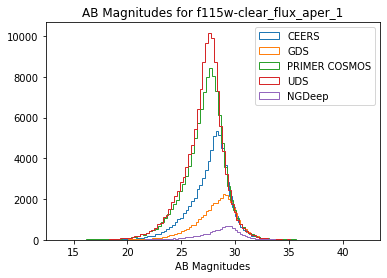

In [15]:
plt.hist(mag_ceers,histtype='step',bins=100,label='CEERS')
plt.hist(mag_gds,histtype='step',bins=100,label='GDS')
plt.hist(mag_cosmos_west,histtype='step',bins=100,label='PRIMER COSMOS')
plt.hist(mag_udss,histtype='step',bins=100,label='UDS')
plt.hist(mag_ngdeep,histtype='step',bins=100,label='NGDeep')
plt.xlabel('AB Magnitudes')
plt.title(f'AB Magnitudes for {filt}')
plt.legend()
plt.show()


In [11]:
ceers

field,id,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2_image,y2_image,xy_image,errx2,erry2,errxy,a_image,b_image,theta_image,cxx_image,cyy_image,cxy_image,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag,x_image,y_image,number,ra,dec,x_world,y_world,flux_iso,fluxerr_iso,area_iso,mag_iso,kron_radius,kron_rcirc,flux_auto,fluxerr_auto,bkg_auto,flag_auto,area_auto,flux_radius_flag,flux_radius_20,flux_radius,flux_radius_90,tot_corr,mag_auto,magerr_auto,flux_aper_0,fluxerr_aper_0,flag_aper_0,bkg_aper_0,mask_aper_0,flux_aper_1,fluxerr_aper_1,flag_aper_1,bkg_aper_1,mask_aper_1,flux_aper_2,fluxerr_aper_2,flag_aper_2,bkg_aper_2,mask_aper_2,flux_aper_3,fluxerr_aper_3,flag_aper_3,bkg_aper_3,mask_aper_3,f1000w_flux_aper_0,f1000w_fluxerr_aper_0,f1000w_flag_aper_0,f1000w_bkg_aper_0,f1000w_mask_aper_0,f1000w_flux_aper_1,f1000w_fluxerr_aper_1,f1000w_flag_aper_1,f1000w_bkg_aper_1,f1000w_mask_aper_1,f1000w_flux_aper_2,f1000w_fluxerr_aper_2,f1000w_flag_aper_2,f1000w_bkg_aper_2,f1000w_mask_aper_2,f1000w_flux_aper_3,f1000w_fluxerr_aper_3,f1000w_flag_aper_3,f1000w_bkg_aper_3,f1000w_mask_aper_3,f1000w_tot_corr,f105w_flux_aper_0,f105w_fluxerr_aper_0,f105w_flag_aper_0,f105w_bkg_aper_0,f105w_mask_aper_0,f105w_flux_aper_1,f105w_fluxerr_aper_1,f105w_flag_aper_1,f105w_bkg_aper_1,f105w_mask_aper_1,f105w_flux_aper_2,f105w_fluxerr_aper_2,f105w_flag_aper_2,f105w_bkg_aper_2,f105w_mask_aper_2,f105w_flux_aper_3,f105w_fluxerr_aper_3,f105w_flag_aper_3,f105w_bkg_aper_3,f105w_mask_aper_3,f105w_tot_corr,f115w-clear_flux_aper_0,f115w-clear_fluxerr_aper_0,f115w-clear_flag_aper_0,f115w-clear_bkg_aper_0,f115w-clear_mask_aper_0,f115w-clear_flux_aper_1,f115w-clear_fluxerr_aper_1,f115w-clear_flag_aper_1,f115w-clear_bkg_aper_1,f115w-clear_mask_aper_1,f115w-clear_flux_aper_2,f115w-clear_fluxerr_aper_2,f115w-clear_flag_aper_2,f115w-clear_bkg_aper_2,f115w-clear_mask_aper_2,f115w-clear_flux_aper_3,f115w-clear_fluxerr_aper_3,f115w-clear_flag_aper_3,f115w-clear_bkg_aper_3,f115w-clear_mask_aper_3,f115w-clear_tot_corr,f125w_flux_aper_0,f125w_fluxerr_aper_0,f125w_flag_aper_0,f125w_bkg_aper_0,f125w_mask_aper_0,f125w_flux_aper_1,f125w_fluxerr_aper_1,f125w_flag_aper_1,f125w_bkg_aper_1,f125w_mask_aper_1,f125w_flux_aper_2,f125w_fluxerr_aper_2,f125w_flag_aper_2,f125w_bkg_aper_2,f125w_mask_aper_2,f125w_flux_aper_3,f125w_fluxerr_aper_3,f125w_flag_aper_3,f125w_bkg_aper_3,f125w_mask_aper_3,f125w_tot_corr,f1280w_flux_aper_0,f1280w_fluxerr_aper_0,f1280w_flag_aper_0,f1280w_bkg_aper_0,f1280w_mask_aper_0,f1280w_flux_aper_1,f1280w_fluxerr_aper_1,f1280w_flag_aper_1,f1280w_bkg_aper_1,f1280w_mask_aper_1,f1280w_flux_aper_2,f1280w_fluxerr_aper_2,f1280w_flag_aper_2,f1280w_bkg_aper_2,f1280w_mask_aper_2,f1280w_flux_aper_3,f1280w_fluxerr_aper_3,f1280w_flag_aper_3,f1280w_bkg_aper_3,f1280w_mask_aper_3,f1280w_tot_corr,f140w_flux_aper_0,f140w_fluxerr_aper_0,f140w_flag_aper_0,f140w_bkg_aper_0,f140w_mask_aper_0,f140w_flux_aper_1,f140w_fluxerr_aper_1,f140w_flag_aper_1,f140w_bkg_aper_1,f140w_mask_aper_1,f140w_flux_aper_2,f140w_fluxerr_aper_2,f140w_flag_aper_2,f140w_bkg_aper_2,f140w_mask_aper_2,f140w_flux_aper_3,f140w_fluxerr_aper_3,f140w_flag_aper_3,f140w_bkg_aper_3,f140w_mask_aper_3,f140w_tot_corr,f1500w_flux_aper_0,f1500w_fluxerr_aper_0,f1500w_flag_aper_0,f1500w_bkg_aper_0,f1500w_mask_aper_0,f1500w_flux_aper_1,f1500w_fluxerr_aper_1,f1500w_flag_aper_1,f1500w_bkg_aper_1,f1500w_mask_aper_1,f1500w_flux_aper_2,f1500w_fluxerr_aper_2,f1500w_flag_aper_2,f1500w_bkg_aper_2,f1500w_mask_aper_2,f1500w_flux_aper_3,f1500w_fluxerr_aper_3,f1500w_flag_aper_3,f1500w_bkg_aper_3,f1500w_mask_aper_3,f1500w_tot_corr,f150w-clear_flux_aper_0,f150w-clear_fluxerr_aper_0,f150w-clear_flag_aper_0,f150w-clear_bkg_aper_0,f150w-clear_mask_aper_0,f150w-clear_flux_aper_1,f150w-clear_fluxerr_aper_1,f150w-clear_flag_aper_1,f150w-clear_bkg_aper_1,f150w-clear_mask_aper_1,f150w-clear_flux_aper_2,f150w-clear_fluxerr_aper_2,f150w-clear_flag_aper_2,f150w-clear_bkg_aper_2,f150w-clear_mask_aper_2,f150w-clear_flux_aper_3,f150w-clear_fluxerr_aper_3,f150w-clea

In [ ]:
soft = utilities.basic_lupt_soft
lups = utilities.flux_to_lupt